In [30]:
from glob import glob
from os.path import join
import tensorflow as tf
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 150
train_split = int(num_files*0.7)
val_split = int(num_files*0.8)
variables = ["REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_train = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
data_list = []
for p, patch_file in enumerate(patch_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_val = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
data_list = []
for p, patch_file in enumerate(patch_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_test = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_2

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_train = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_val = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_test = xr.concat(csv_data_list, dim="p").to_array().transpose()

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTO

In [7]:
# Normalize the training data
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [8]:
# Normalize output data
output_scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
output_scale_stats.loc[0, "mean"] = output_train.mean()
output_scale_stats.loc[0, "sd"] = output_train.std()
output_train_norm = (output_train - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]
output_val_norm = (output_val - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]
output_test_norm = (output_test - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]

In [9]:
inv_model = models.Sequential()
inv_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
inv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
inv_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
inv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
inv_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
inv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
inv_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
inv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
inv_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
inv_model.add(GDL_layers.RotInvPool())
inv_model.add(layers.Flatten())
inv_model.add(layers.Dense(32, activation='relu'))
inv_model.add(layers.Dense(2))

2022-07-14 12:12:59.746603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-14 12:13:00.309525: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:88:00.0, compute capability: 7.0


In [10]:
inv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d (RotEquivC  (None, 142, 142, 4, 32)  320       
 onv2D)                                                          
                                                                 
 rot_equiv_pool2d (RotEquivP  (None, 71, 71, 4, 32)    0         
 ool2D)                                                          
                                                                 
 rot_equiv_conv2d_1 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_1 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_2 (RotEqui  (None, 32, 32, 4, 64)    1

In [11]:
inv_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [12]:
inv_history = inv_model.fit(x=input_train_norm, y=output_train_norm, epochs=20, validation_data=(input_val_norm, output_val_norm))

Epoch 1/20


2022-07-14 12:13:05.756190: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1065/1065 [==============================] - 76s 66ms/step - loss: 0.2643 - mse: 0.2643 - val_loss: 0.1327 - val_mse: 0.1327
Epoch 2/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.2928 - mse: 0.2928 - val_loss: 0.2081 - val_mse: 0.2081
Epoch 3/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.1947 - mse: 0.1947 - val_loss: 0.1307 - val_mse: 0.1307
Epoch 4/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.1392 - mse: 0.1392 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 5/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.1040 - mse: 0.1040 - val_loss: 0.0727 - val_mse: 0.0727
Epoch 6/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 0.0744 - val_mse: 0.0744
Epoch 7/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0493 - val_mse: 0.0493
Epoch 8/20
1065/1065 [==============================] - 69s

In [13]:
equiv_model = models.Sequential()
equiv_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
equiv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
equiv_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
equiv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
equiv_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
equiv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
equiv_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
equiv_model.add(GDL_layers.RotEquivPool2D((2, 2)))
equiv_model.add(GDL_layers.RotEquivConv2D(100, (3, 3)))
equiv_model.add(layers.Flatten())
equiv_model.add(layers.Dense(32, activation='relu'))
equiv_model.add(layers.Dense(2))

In [14]:
equiv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d_5 (RotEqui  (None, 142, 142, 4, 32)  320       
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_4 (RotEqui  (None, 71, 71, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_6 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_5 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_7 (RotEqui  (None, 32, 32, 4, 64)   

In [15]:
equiv_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [16]:
equiv_history = equiv_model.fit(x=input_train_norm, y=output_train_norm, epochs=20, validation_data=(input_val_norm, output_val_norm))

Epoch 1/20
1065/1065 [==============================] - 74s 65ms/step - loss: 0.2478 - mse: 0.2478 - val_loss: 0.0956 - val_mse: 0.0956
Epoch 2/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0941 - mse: 0.0941 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 3/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 4/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0502 - val_mse: 0.0502
Epoch 5/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0414 - mse: 0.0414 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 6/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 7/20
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 8/20
1065/1065 [==========================

In [17]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(2))

In [18]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [19]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [20]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=20, validation_data=(input_val_norm, output_val_norm))

Epoch 1/20
1065/1065 [==============================] - 13s 12ms/step - loss: 0.2865 - mse: 0.2865 - val_loss: 0.1171 - val_mse: 0.1171
Epoch 2/20
1065/1065 [==============================] - 12s 12ms/step - loss: 0.1430 - mse: 0.1430 - val_loss: 0.1895 - val_mse: 0.1895
Epoch 3/20
1065/1065 [==============================] - 12s 12ms/step - loss: 0.1048 - mse: 0.1048 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 4/20
1065/1065 [==============================] - 12s 12ms/step - loss: 0.0738 - mse: 0.0738 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 5/20
1065/1065 [==============================] - 12s 12ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 6/20
1065/1065 [==============================] - 12s 12ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0498 - val_mse: 0.0498
Epoch 7/20
1065/1065 [==============================] - 12s 12ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 8/20
1065/1065 [==========================

(0.0, 0.30690135299228133)

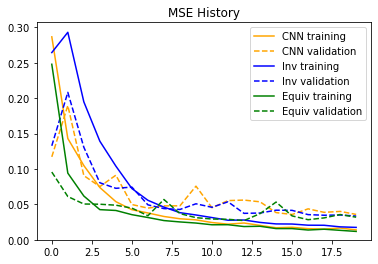

In [26]:
F = plt.Figure(figsize=(6, 4))
plt.plot(cnn_history.history['mse'], label='CNN training', color='orange')
plt.plot(cnn_history.history['val_mse'], label='CNN validation', color='orange', linestyle='dashed')
plt.plot(inv_history.history['mse'], label='Inv training', color='blue')
plt.plot(inv_history.history['val_mse'], label='Inv validation', color='blue', linestyle='dashed')
plt.plot(equiv_history.history['mse'], label='Equiv training', color='green')
plt.plot(equiv_history.history['val_mse'], label='Equiv validation', color='green', linestyle='dashed')
plt.legend()
plt.title("MSE History")
ax = plt.gca()
ax.set_ylim(bottom=0)

In [22]:
inv_model.save("saved_models/rot_equiv_vs_CNN/inv_model")
equiv_model.save("saved_models/rot_equiv_vs_CNN/equiv_model")
cnn_model.save("saved_models/rot_equiv_vs_CNN/cnn_model")

INFO:tensorflow:Assets written to: saved_models/rot_equiv_vs_CNN/inv_model/assets
INFO:tensorflow:Assets written to: saved_models/rot_equiv_vs_CNN/equiv_model/assets


INFO:tensorflow:Assets written to: saved_models/rot_equiv_vs_CNN/cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/rot_equiv_vs_CNN/cnn_model/assets


In [27]:
inv_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 9s 22ms/step - loss: 0.0448 - mse: 0.0448


[0.04483060538768768, 0.04483060538768768]

In [28]:
equiv_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 9s 22ms/step - loss: 0.0425 - mse: 0.0425


[0.04250704497098923, 0.04250704497098923]

In [29]:
cnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 3s 7ms/step - loss: 0.0480 - mse: 0.0480


[0.04802647978067398, 0.04802647978067398]

In [31]:
inv_latent = tf.keras.Model(inv_model.inputs, inv_model.layers[-2].output)
equiv_latent = tf.keras.Model(equiv_model.inputs, equiv_model.layers[-2].output)
cnn_latent = tf.keras.Model(cnn_model.inputs, cnn_model.layers[-2].output)

In [32]:
inv_latent_preds = inv_latent.predict(input_test_norm)
equiv_latent_preds = equiv_latent.predict(input_test_norm)
cnn_latent_preds = cnn_latent.predict(input_test_norm)

406/406 [==============================] - 9s 22ms/step


406/406 [==============================] - 9s 22ms/step


406/406 [==============================] - 3s 6ms/step


In [35]:
equiv_latent_preds[0]

array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        7.1643343,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       , 12.191364 ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        8.420709 ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ], dtype=float32)

In [42]:
equiv_latent.predict(np.rot90(input_test_norm[0:1, :, :, :], k=4, axes=(1,2)))

1/1 [==============================] - 0s 18ms/step


array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         7.1643353,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , 12.191363 ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         8.420711 ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ]], dtype=float32)

In [44]:
np.unique(inv_latent_preds.nonzero()[1])

array([ 1,  5,  6, 11, 21, 22, 25])

In [47]:
np.unique(equiv_latent_preds.nonzero()[1])

array([ 0,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 25, 26, 27, 28, 30])

In [50]:
np.unique(cnn_latent_preds.nonzero()[1])

array([ 0,  1,  2,  5,  6, 12, 13, 14, 15, 16, 18, 21, 22, 23, 25, 26, 28,
       29, 30])

In [55]:
inv_un, inv_count = np.unique(inv_latent_preds.nonzero()[0], return_counts=True)
equiv_un, equiv_count = np.unique(equiv_latent_preds.nonzero()[0], return_counts=True)
cnn_un, cnn_count = np.unique(cnn_latent_preds.nonzero()[0], return_counts=True)

In [57]:
print(inv_count.mean())
print(equiv_count.mean())
print(cnn_count.mean())

2.195610319599538
3.3746919285274184
4.929072006160955
